In [234]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv("./malenia.csv")
df

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,True
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,True
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,NaN
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,False
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,True
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,NaN
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,NaN
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,True
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,NaN


In [236]:
df

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,True
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,True
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,NaN
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,False
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,True
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,NaN
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,NaN
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,True
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,NaN


In [237]:
df.isna().sum()

Host_Death_Time       0
Host_Build            0
Level                 0
Phase                 0
Waterflow_Death       0
Health_Pct            0
Location              0
Phantom_Count         0
Phantom_Build      1196
Phantom_Death      1196
dtype: int64

# 레이블 인코딩

In [238]:
import seaborn as sns 

In [239]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Phantom_Death'])
digit_label = encoder.transform(df['Phantom_Death'])
digit_label

array([1, 1, 2, ..., 1, 2, 0])

In [240]:
df['Phantom_Death'] = digit_label

In [241]:
df

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,True,66.0,INNER,2.0,RAW_MELEE,1
1,261.0,HYBRID,169.0,2.0,True,92.0,CENTER,2.0,PROC_CAST,1
2,148.0,PROC_MELEE,179.0,1.0,True,93.0,INNER,1.0,NaN,2
3,247.0,RAW_CAST,141.0,2.0,False,89.0,INNER,2.0,RAW_MELEE,0
4,163.0,PROC_CAST,126.0,1.0,True,64.0,INNER,2.0,PROC_MELEE,1
...,...,...,...,...,...,...,...,...,...,...
3616,204.0,RAW_CAST,171.0,2.0,False,23.0,OUTER,1.0,NaN,2
3617,259.0,HYBRID,160.0,2.0,False,55.0,INNER,1.0,NaN,2
3618,288.0,PROC_CAST,173.0,2.0,False,60.0,INNER,2.0,HYBRID,1
3619,58.0,PROC_CAST,139.0,2.0,False,42.0,CENTER,1.0,NaN,2


In [242]:
df['Waterflow_Death'] = df['Waterflow_Death'].apply(lambda x : 1 if x else 0 )  

In [243]:
df.head()

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
0,299.0,RAW_MELEE,124.0,2.0,1,66.0,INNER,2.0,RAW_MELEE,1
1,261.0,HYBRID,169.0,2.0,1,92.0,CENTER,2.0,PROC_CAST,1
2,148.0,PROC_MELEE,179.0,1.0,1,93.0,INNER,1.0,NaN,2
3,247.0,RAW_CAST,141.0,2.0,0,89.0,INNER,2.0,RAW_MELEE,0
4,163.0,PROC_CAST,126.0,1.0,1,64.0,INNER,2.0,PROC_MELEE,1


# 죽음에 대한 분석 그래프

<AxesSubplot:xlabel='Level', ylabel='Host_Death_Time'>

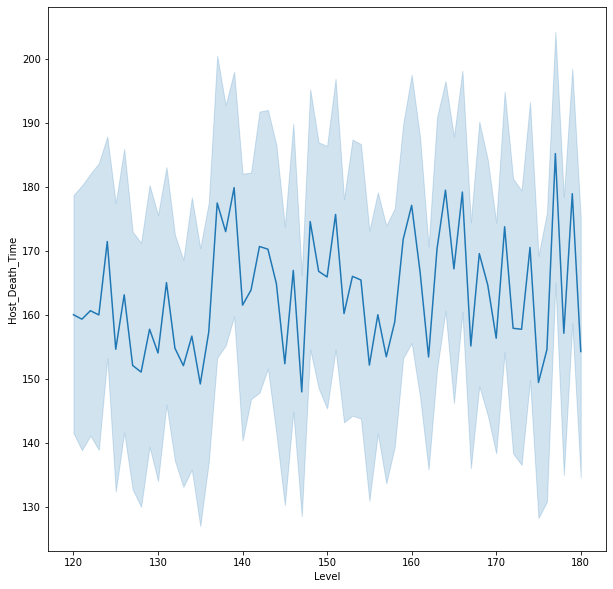

In [244]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y="Host_Death_Time",x="Level")

<AxesSubplot:xlabel='Host_Build', ylabel='Host_Death_Time'>

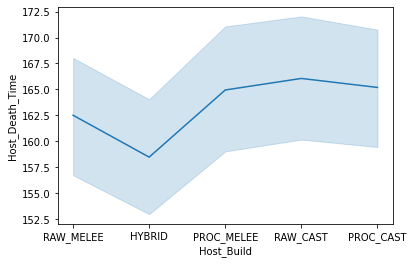

In [245]:
sns.lineplot(data=df,y="Host_Death_Time",x="Host_Build")

<AxesSubplot:xlabel='Phantom_Count', ylabel='Host_Death_Time'>

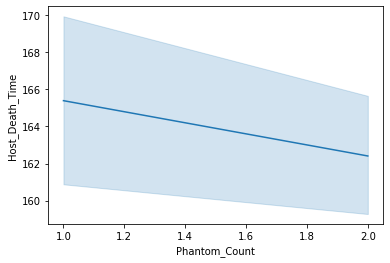

In [246]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phantom_Count")

<AxesSubplot:xlabel='Phase', ylabel='Host_Death_Time'>

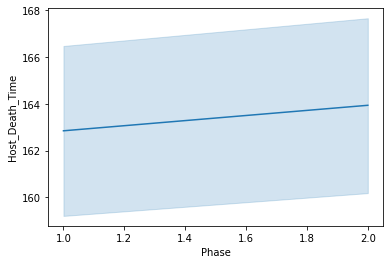

In [247]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phase")

<AxesSubplot:xlabel='Phantom_Build', ylabel='Host_Death_Time'>

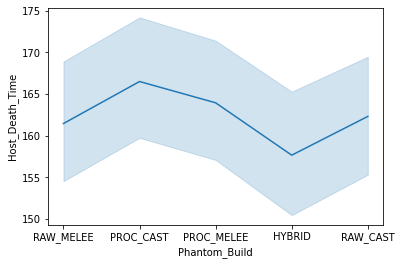

In [248]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phantom_Build")

<AxesSubplot:xlabel='Phantom_Death', ylabel='Host_Death_Time'>

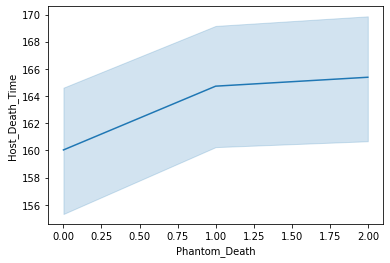

In [249]:
sns.lineplot(data=df,y="Host_Death_Time",x="Phantom_Death")

# 페이즈에 대한 분석

<AxesSubplot:xlabel='Level', ylabel='Phase'>

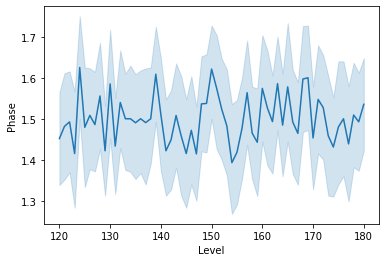

In [250]:
sns.lineplot(data=df,y="Phase",x="Level")

<AxesSubplot:xlabel='Phantom_Count', ylabel='Phase'>

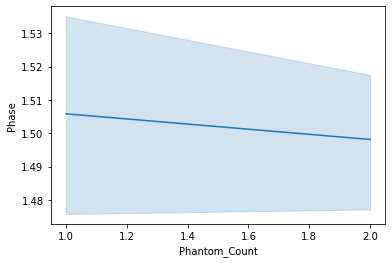

In [251]:
sns.lineplot(data=df,y="Phase",x="Phantom_Count")

<AxesSubplot:xlabel='Phantom_Death', ylabel='Phase'>

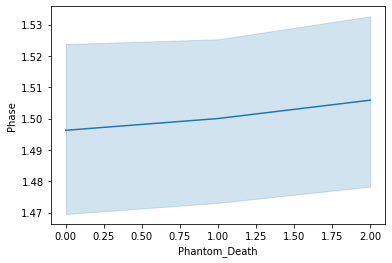

In [252]:
sns.lineplot(data=df,y="Phase",x="Phantom_Death")

<AxesSubplot:xlabel='Host_Build', ylabel='Phase'>

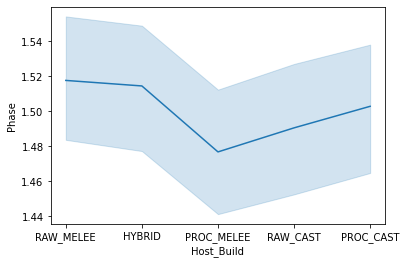

In [253]:
sns.lineplot(data=df,y="Phase",x="Host_Build")

<AxesSubplot:xlabel='Host_Death_Time', ylabel='Phase'>

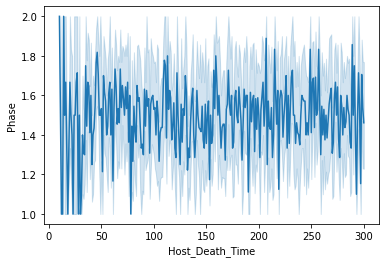

In [254]:
sns.lineplot(data=df,y="Phase",x="Host_Death_Time")

In [255]:
df[df['Host_Death_Time']<12]

,Host_Death_Time,Host_Build,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death
982,11.0,PROC_MELEE,159.0,2.0,0,86.0,CENTER,1.0,NaN,2
1628,11.0,PROC_CAST,158.0,1.0,0,92.0,OUTER,2.0,RAW_CAST,1
2303,11.0,PROC_MELEE,133.0,1.0,0,88.0,INNER,2.0,PROC_MELEE,0
2548,11.0,PROC_CAST,173.0,2.0,1,83.0,OUTER,2.0,RAW_MELEE,0
2699,10.0,PROC_MELEE,122.0,2.0,1,78.0,CENTER,1.0,NaN,2


# 궁극기에 관한 분석

<AxesSubplot:xlabel='Level', ylabel='Waterflow_Death'>

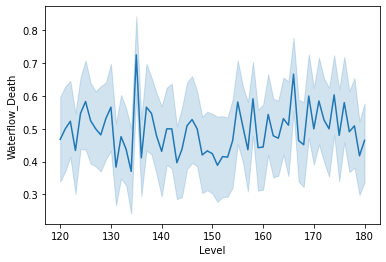

In [256]:
sns.lineplot(data=df,y="Waterflow_Death",x="Level")

<AxesSubplot:xlabel='Location', ylabel='Waterflow_Death'>

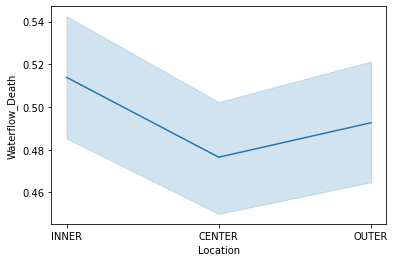

In [259]:
sns.lineplot(data=df,y="Waterflow_Death",x="Location")

Text(0, 0.5, 'count')

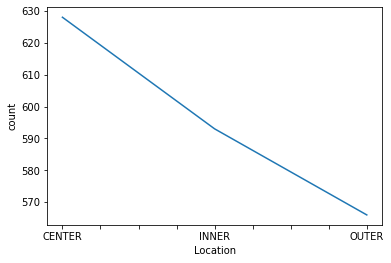

In [258]:
df[df['Waterflow_Death']==1]["Location"].value_counts().plot()
plt.xlabel("Location")
plt.ylabel("count")

Text(0, 0.5, 'count')

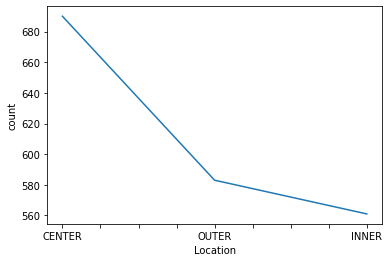

In [260]:
df[df['Waterflow_Death']==0]["Location"].value_counts().plot()
plt.xlabel("Location")
plt.ylabel("count")

## 원 핫 인코딩

In [261]:
df = pd.get_dummies(df,columns=["Host_Build"])
df.head()

,Host_Death_Time,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Build,Phantom_Death,Host_Build_HYBRID,Host_Build_PROC_CAST,Host_Build_PROC_MELEE,Host_Build_RAW_CAST,Host_Build_RAW_MELEE
0,299.0,124.0,2.0,1,66.0,INNER,2.0,RAW_MELEE,1,0,0,0,0,1
1,261.0,169.0,2.0,1,92.0,CENTER,2.0,PROC_CAST,1,1,0,0,0,0
2,148.0,179.0,1.0,1,93.0,INNER,1.0,NaN,2,0,0,1,0,0
3,247.0,141.0,2.0,0,89.0,INNER,2.0,RAW_MELEE,0,0,0,0,1,0
4,163.0,126.0,1.0,1,64.0,INNER,2.0,PROC_MELEE,1,0,1,0,0,0


In [262]:
df = pd.get_dummies(df,columns=["Phantom_Build"])
df.head()

,Host_Death_Time,Level,Phase,Waterflow_Death,Health_Pct,Location,Phantom_Count,Phantom_Death,Host_Build_HYBRID,Host_Build_PROC_CAST,Host_Build_PROC_MELEE,Host_Build_RAW_CAST,Host_Build_RAW_MELEE,Phantom_Build_HYBRID,Phantom_Build_PROC_CAST,Phantom_Build_PROC_MELEE,Phantom_Build_RAW_CAST,Phantom_Build_RAW_MELEE
0,299.0,124.0,2.0,1,66.0,INNER,2.0,1,0,0,0,0,1,0,0,0,0,1
1,261.0,169.0,2.0,1,92.0,CENTER,2.0,1,1,0,0,0,0,0,1,0,0,0
2,148.0,179.0,1.0,1,93.0,INNER,1.0,2,0,0,1,0,0,0,0,0,0,0
3,247.0,141.0,2.0,0,89.0,INNER,2.0,0,0,0,0,1,0,0,0,0,0,1
4,163.0,126.0,1.0,1,64.0,INNER,2.0,1,0,1,0,0,0,0,0,1,0,0


In [263]:
df = pd.get_dummies(df,columns=["Location"])
df.head()

,Host_Death_Time,Level,Phase,Waterflow_Death,Health_Pct,Phantom_Count,Phantom_Death,Host_Build_HYBRID,Host_Build_PROC_CAST,Host_Build_PROC_MELEE,Host_Build_RAW_CAST,Host_Build_RAW_MELEE,Phantom_Build_HYBRID,Phantom_Build_PROC_CAST,Phantom_Build_PROC_MELEE,Phantom_Build_RAW_CAST,Phantom_Build_RAW_MELEE,Location_CENTER,Location_INNER,Location_OUTER
0,299.0,124.0,2.0,1,66.0,2.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,261.0,169.0,2.0,1,92.0,2.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,148.0,179.0,1.0,1,93.0,1.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0
3,247.0,141.0,2.0,0,89.0,2.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,163.0,126.0,1.0,1,64.0,2.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0



# 모델링

In [ ]:
df = df.drop('Health_Pct',axis=1)

In [85]:
df

,Host_Death_Time,Level,Phase,Waterflow_Death,Phantom_Count,Phantom_Death,Host_Build_HYBRID,Host_Build_PROC_CAST,Host_Build_PROC_MELEE,Host_Build_RAW_CAST,Host_Build_RAW_MELEE,Phantom_Build_HYBRID,Phantom_Build_PROC_CAST,Phantom_Build_PROC_MELEE,Phantom_Build_RAW_CAST,Phantom_Build_RAW_MELEE,Location_CENTER,Location_INNER,Location_OUTER
0,299.0,124.0,2.0,1,2.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,261.0,169.0,2.0,1,2.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,148.0,179.0,1.0,1,0.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0
3,247.0,141.0,2.0,0,2.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,163.0,126.0,1.0,1,2.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,204.0,171.0,2.0,0,0.0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
3617,259.0,160.0,2.0,0,0.0,2,1,0,0,0,0,0,0,0,0,0,0,1,0
3618,288.0,173.0,2.0,0,2.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
3619,58.0,139.0,2.0,0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0


In [86]:
x = df.drop("Phase",axis=1)
y = df.loc[:,'Phase']

In [87]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x,y)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=9).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.63646408839779, 0.4624724061810154)

In [89]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.20161879034087382, -0.2590288195815247)

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.007328086313185933, -0.02394837665369942)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree=2)
x_poly = P.fit_transform(x)
x_tr, x_te, y_tr, y_te = train_test_split(x_poly,y)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.049080678184412085, -0.0636138144022318)

In [110]:
from sklearn.preprocessing import MinMaxScaler

x_scaled = MinMaxScaler().fit_transform(x)
x_tr, x_te, y_tr, y_te = train_test_split(x_scaled,y)

In [91]:
from sklearn.linear_model import Lasso

model = Lasso().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.0, -0.0003805719933207552)

In [92]:
from sklearn.linear_model import Ridge

model = Ridge().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.007328060960214433, -0.023901320114313673)

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.5406998158379374, 0.4746136865342163)

In [94]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=20,max_leaf_nodes=20).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.5683241252302026, 0.46357615894039733)

In [95]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10).fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.30713230711946615, -0.37386212759037596)

In [108]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(1.0, 0.5143487858719646)

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.6567219152854512, 0.46909492273730685)

In [98]:
import xgboost as xgb 

model = xgb.XGBRegressor(objective='reg:linear').fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

[16:18:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


(0.8184738907655768, -0.2563884891431043)

## 모델들 결과 비교 

In [264]:
mods = [KNeighborsClassifier,KNeighborsRegressor,LinearRegression,Lasso,Ridge,LogisticRegression,DecisionTreeClassifier,DecisionTreeRegressor,RandomForestClassifier]

for mod in mods :
    print(mod)
    
    model = mod().fit(x_tr,y_tr)
    print("트레인 스코어 : ", round(model.score(x_tr,y_tr),4)*100," %")
    print("테스트 스코어 : ", round(model.score(x_te,y_te),4)*100," %")
    print()
    
    

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
트레인 스코어 :  68.36  %
테스트 스코어 :  52.21  %

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
트레인 스코어 :  19.48  %
테스트 스코어 :  -17.96  %

<class 'sklearn.linear_model._base.LinearRegression'>
트레인 스코어 :  0.21  %
테스트 스코어 :  -0.37  %

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
트레인 스코어 :  0.0  %
테스트 스코어 :  -0.0  %

<class 'sklearn.linear_model._ridge.Ridge'>
트레인 스코어 :  0.36  %
테스트 스코어 :  -0.18  %

<class 'sklearn.linear_model._logistic.LogisticRegression'>
트레인 스코어 :  53.37  %
테스트 스코어 :  50.55  %

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
트레인 스코어 :  100.0  %
테스트 스코어 :  48.339999999999996  %

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
트레인 스코어 :  100.0  %
테스트 스코어 :  -104.86999999999999  %

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
트레인 스코어 :  100.0  %
테스트 스코어 :  49.01  %



In [112]:
print(RandomForestClassifier)
model = RandomForestClassifier().fit(x_tr,y_tr)
print("트레인 스코어 : ", round(model.score(x_tr,y_tr),4)*100," %")
print("테스트 스코어 : ", round(model.score(x_te,y_te),4)*100," %")
print()

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
트레인 스코어 :  100.0  %
테스트 스코어 :  48.79  %



## Grid Search 

In [154]:
from sklearn.model_selection import GridSearchCV

## KNeighborsClassifier 결과

In [135]:
model = KNeighborsClassifier()

params = {'n_neighbors':range(1,40),
          'weights':['uniform', 'distance'],
          'leaf_size' : range(1,10)
             }

gs = GridSearchCV(model,params).fit(x_tr,y_tr)

In [136]:
gs.best_score_

0.5241252302025783

In [137]:
gs.best_params_

{'leaf_size': 1, 'n_neighbors': 36, 'weights': 'uniform'}

## LogisticRegression 결과 

In [138]:
model = LogisticRegression()

params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'max_iter':range(50,1000)
                  
             }

gs = GridSearchCV(model,params).fit(x_tr,y_tr)

/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9500 fits failed out of a total of 19000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4750 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic

In [139]:
gs.best_score_

0.505340699815838

In [140]:
gs.best_params_

{'max_iter': 50, 'penalty': 'none'}

## RandomForestClassifier 결과

In [151]:
model = RandomForestClassifier()

params = {'n_estimators':range(90,110),
                 'max_depth':range(1,5),
                  'max_leaf_nodes':range(1,5)
                  
             }

gs = GridSearchCV(model,params).fit(x_tr,y_tr)

/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/hong/Library/Python/3.8/lib/python/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterat

In [152]:
gs.best_score_

0.5167587476979743

In [153]:
gs.best_params_

{'max_depth': 4, 'max_leaf_nodes': 4, 'n_estimators': 145}

## 예측 

In [155]:
model = KNeighborsClassifier(leaf_size=1, n_neighbors=36, weights= 'uniform').fit(x_tr,y_tr)

In [156]:
model.score(x_tr,y_tr),model.score(x_te,y_te)

(0.5738489871086556, 0.5110375275938189)

In [157]:
x.columns

,Host_Death_Time,Level,Waterflow_Death,Phantom_Count,Phantom_Death,Host_Build_HYBRID,Host_Build_PROC_CAST,Host_Build_PROC_MELEE,Host_Build_RAW_CAST,Host_Build_RAW_MELEE,Phantom_Build_HYBRID,Phantom_Build_PROC_CAST,Phantom_Build_PROC_MELEE,Phantom_Build_RAW_CAST,Phantom_Build_RAW_MELEE,Location_CENTER,Location_INNER,Location_OUTER
0,299.0,124.0,1,2.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,261.0,169.0,1,2.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,148.0,179.0,1,0.0,2,0,0,1,0,0,0,0,0,0,0,0,1,0
3,247.0,141.0,0,2.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,163.0,126.0,1,2.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,204.0,171.0,0,0.0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
3617,259.0,160.0,0,0.0,2,1,0,0,0,0,0,0,0,0,0,0,1,0
3618,288.0,173.0,0,2.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
3619,58.0,139.0,0,0.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0


In [159]:
to_predict = x.loc[0,:]

In [229]:
to_predict["Host_Death_Time"] = 10
to_predict["Level"] = 180
to_predict["Waterflow_Death"] = 1
to_predict["Phantom_Count"] = 2
to_predict["Phantom_Death"] = 0
to_predict["Host_Build_HYBRID"] = 0
to_predict["Host_Build_PROC_CAST"] = 0
to_predict["Host_Build_PROC_MELEE"] = 0
to_predict["Host_Build_RAW_CAST"] = 0
to_predict["Host_Build_RAW_MELEE"] = 1
to_predict["Phantom_Build_HYBRID"] = 0
to_predict["Phantom_Build_PROC_CAST"] = 0
to_predict["Phantom_Build_PROC_MELEE"] = 0
to_predict["Phantom_Build_RAW_CAST"] = 0
to_predict["Phantom_Build_RAW_MELEE"] = 1
to_predict["Location_INNER"] = 1
to_predict["Location_OUTER"] = 0
to_predict["Location_CENTER"] = 0



/Users/hong/Library/Python/3.8/lib/python/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [230]:
to_predict

Host_Death_Time              10.0
Level                       180.0
Waterflow_Death               1.0
Phantom_Count                 2.0
Phantom_Death                 0.0
Host_Build_HYBRID             0.0
Host_Build_PROC_CAST          0.0
Host_Build_PROC_MELEE         0.0
Host_Build_RAW_CAST           0.0
Host_Build_RAW_MELEE          1.0
Phantom_Build_HYBRID          0.0
Phantom_Build_PROC_CAST       0.0
Phantom_Build_PROC_MELEE      0.0
Phantom_Build_RAW_CAST        0.0
Phantom_Build_RAW_MELEE       1.0
Location_CENTER               0.0
Location_INNER                1.0
Location_OUTER                0.0
Name: 0, dtype: float64

In [231]:
to_pre = pd.DataFrame(to_predict)

In [232]:
to_pre = to_pre.transpose()
to_pre

,Host_Death_Time,Level,Waterflow_Death,Phantom_Count,Phantom_Death,Host_Build_HYBRID,Host_Build_PROC_CAST,Host_Build_PROC_MELEE,Host_Build_RAW_CAST,Host_Build_RAW_MELEE,Phantom_Build_HYBRID,Phantom_Build_PROC_CAST,Phantom_Build_PROC_MELEE,Phantom_Build_RAW_CAST,Phantom_Build_RAW_MELEE,Location_CENTER,Location_INNER,Location_OUTER
0,10.0,180.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [233]:
model.predict(to_pre)

/Users/hong/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([2.])